In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings # warnings 무시 
plt.style.use('seaborn')

%matplotlib inline

## 앞으로 해야할 프로세스 정리
1. 데이터셋 확인 
2. EDA
3. feature enginerring
4. model 생성
5. 모델 학습 및 예측 
6. 평가

## 1.데이터셋 확인

In [3]:
df_train = pd.read_csv('C:/Users/User/Documents/boot camp - study/github/hojeong-project/필사 스터디/titanic/train.csv')
df_test = pd.read_csv('C:/Users/User/Documents/boot camp - study/github/hojeong-project/필사 스터디/titanic/test.csv')
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 NULL data check

In [12]:
# 각 칼럼별 결측값의 비율을 보는 방법 
for col in df_train.columns:
    msg = 'columns: {:>10}\t percent of NaN value:{:.2f}%'.format(col,100*
            (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

# 각 칼럼별 결측값의 비율은 보는 방법(2)
# print((df_train.isna().sum() / len(df_train)) * 100)
# print((df_train.isnull().sum() / len(df_train))*100)

# {:>10}\t ->오른쪽 정렬 및 탭하기
# {:2f}% -> 소수점 두번째 자리까지 나타내기    
    

columns: PassengerId	 percent of NaN value:0.00%
columns:   Survived	 percent of NaN value:0.00%
columns:     Pclass	 percent of NaN value:0.00%
columns:       Name	 percent of NaN value:0.00%
columns:        Sex	 percent of NaN value:0.00%
columns:        Age	 percent of NaN value:19.87%
columns:      SibSp	 percent of NaN value:0.00%
columns:      Parch	 percent of NaN value:0.00%
columns:     Ticket	 percent of NaN value:0.00%
columns:       Fare	 percent of NaN value:0.00%
columns:      Cabin	 percent of NaN value:77.10%
columns:   Embarked	 percent of NaN value:0.22%
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex   

In [13]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t percent of NaN value:{:.2f}%'.format(col,100*
            (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)
    

columns: PassengerId	 percent of NaN value:0.00%
columns:     Pclass	 percent of NaN value:0.00%
columns:       Name	 percent of NaN value:0.00%
columns:        Sex	 percent of NaN value:0.00%
columns:        Age	 percent of NaN value:20.57%
columns:      SibSp	 percent of NaN value:0.00%
columns:      Parch	 percent of NaN value:0.00%
columns:     Ticket	 percent of NaN value:0.00%
columns:       Fare	 percent of NaN value:0.24%
columns:      Cabin	 percent of NaN value:78.23%
columns:   Embarked	 percent of NaN value:0.00%


<AxesSubplot:>

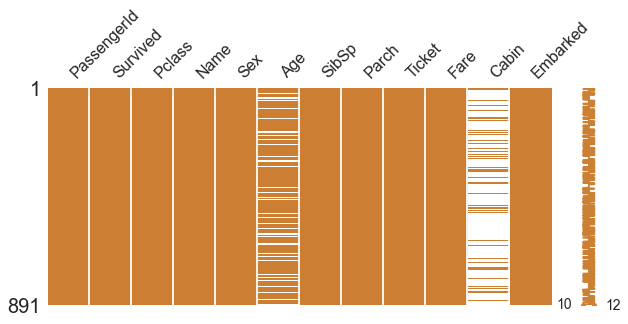

In [21]:
# 결측치 msno를 이용하여 시각적으로 보기(matrix)
msno.matrix(df=df_train.iloc[:,:],figsize=(10,4),color=(0.8,0.5,0.2))

<AxesSubplot:>

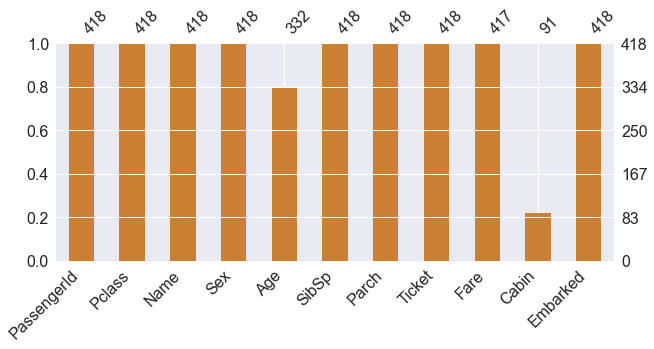

In [26]:
# 결측치 msno를 이용하여 시각적으로 보기(bar)
# [:,:] 없어도 같은 결과 나온다
msno.bar(df=df_test.iloc[:,:],figsize=(10,4),color=(0.8,0.5,0.2))

-> 결측치 비율 cabin(80%) > age(20%) > fare(0.2)

### 1.2 Target label 

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


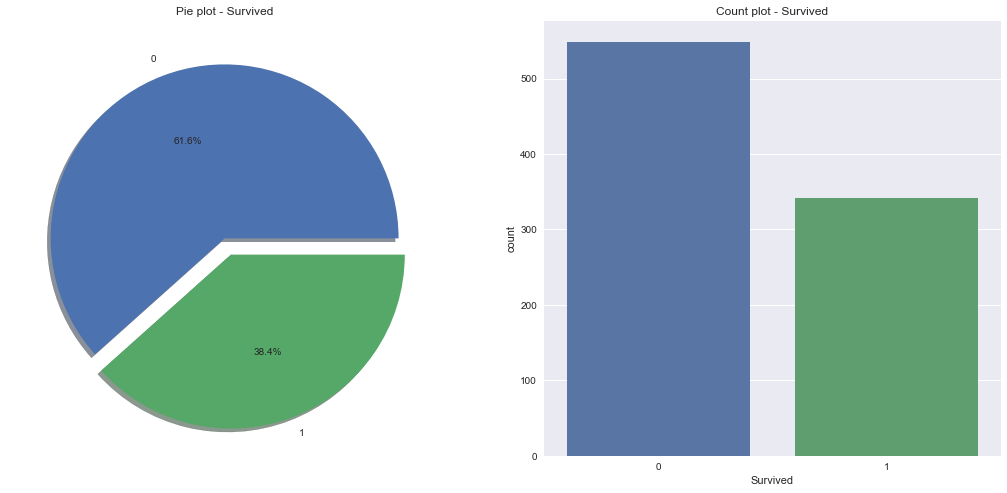

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# survived 비율을 pie차트로 나타냄 
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show() # 사망자가 더 많음 

## 2.Exploratory data analysis

### 2-1 Pclass

<AxesSubplot:xlabel='Pclass'>

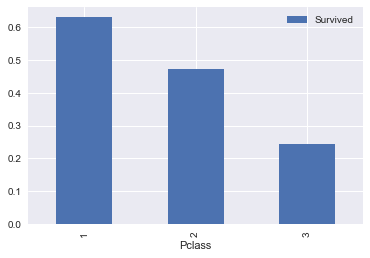

In [41]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(
    by='Survived',ascending=False).plot.bar()
# pcalss 그룹별로 생존 평균을 구했는데 1>2>3 등급 순서(pclass가 좋을수록 생존률 높다)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


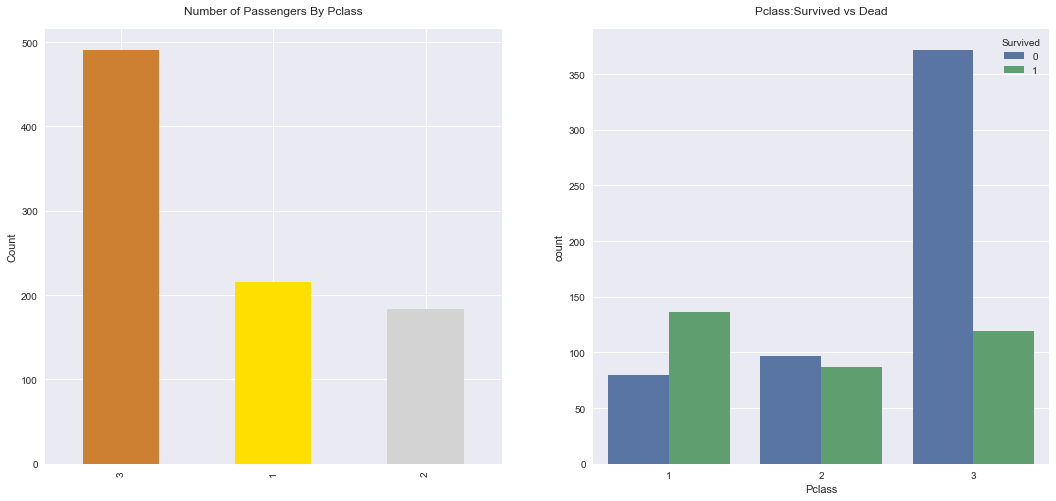

In [42]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
# 그냥 pclass count plot 그리기
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1]) #count plot패키지 이용
ax[1].set_title('Pclass:Survived vs Dead',y=y_position)
plt.show() # pclass 1 만 더 생존자가 높았다 

In [29]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
# pclass 별 survived 개수 확인(3>1>2)

,Survived
Pclass,
1,216
2,184
3,491


In [30]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()
# pclass 별 생존자 개수 확인(1>3>2)

,Survived
Pclass,
1,136
2,87
3,119


In [33]:
# pcalss , survived 한번에 보여주는데 margin을 넣으면 더 자세히 봄 
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 2.2 Sex

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


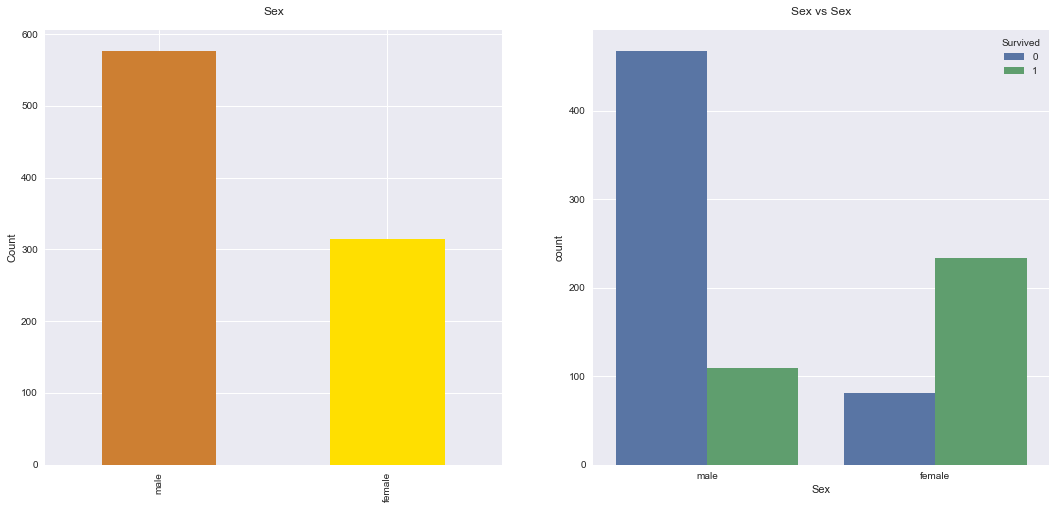

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Sex'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'], ax=ax[0])
# 그냥 count plot 그리기
ax[0].set_title('Sex',y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1]) #count plot패키지 이용
ax[1].set_title('Sex vs Sex',y=y_position)
plt.show() # 남자가 더 많은데 여자가 생존률은 더 높음 

In [ ]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [40]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Both sex and Pclass

c:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


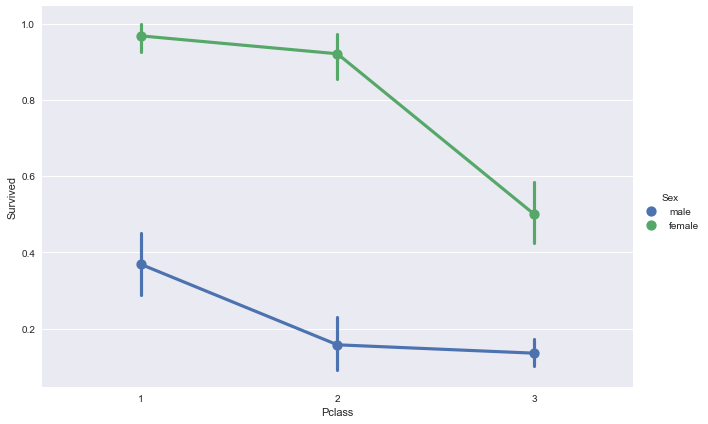

In [48]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)
# pclass , sex 범주에 대한 생존을 3차원 그래프로 그림 
# factorplot 을 이용하면 효과적으로 다양한 그래프를 그릴 수 있다 .

c:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


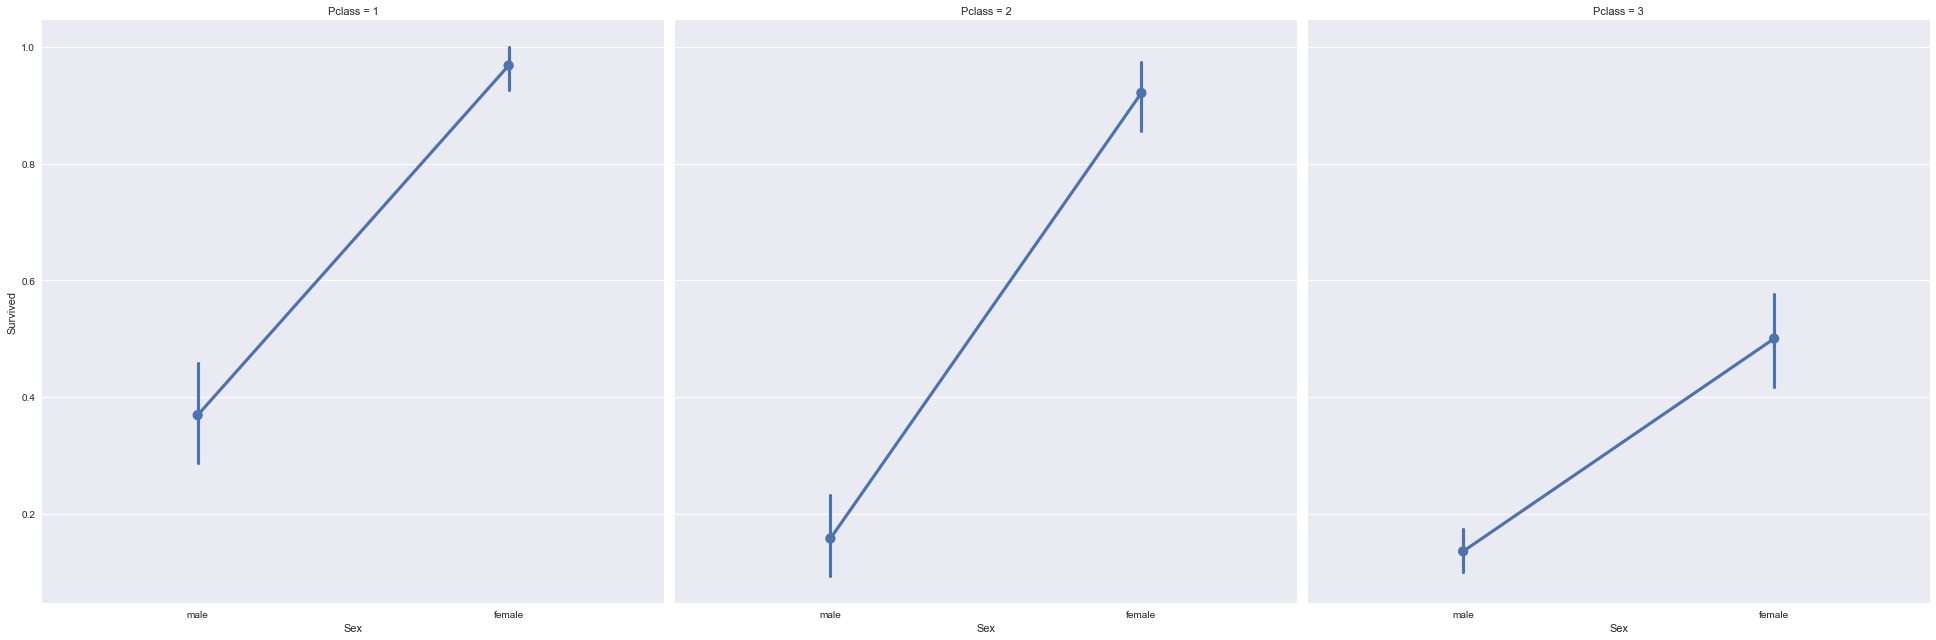

In [51]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1)
# satureation옵션은 강도 조절 hue를 옵션으로하냐 col을 옵션으로 하냐에 따라 나뉘거나 붙여짐

### Age

In [52]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


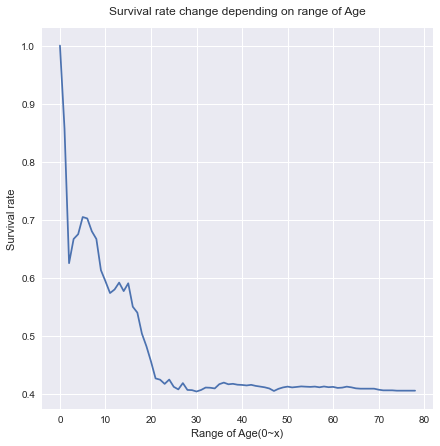

In [60]:
cummulate_survival_ratio = []
for i in range(1,80): # age를 80살까지 반복해서 생존 상태를 확인한다 (숫자가 적을떄 유라할듯)
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/
                                    len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

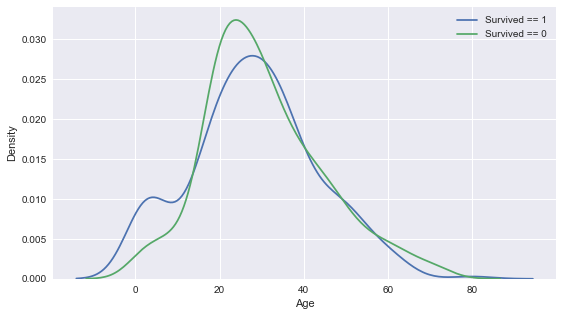

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show() # 연속 숫자형 자료랑 범주형을 나타낼때 두개를 한번에 그리기 위해 kdeplot 이용하면 좋다 
# age가 약 15살 미만지점은 생존이 더 많다 

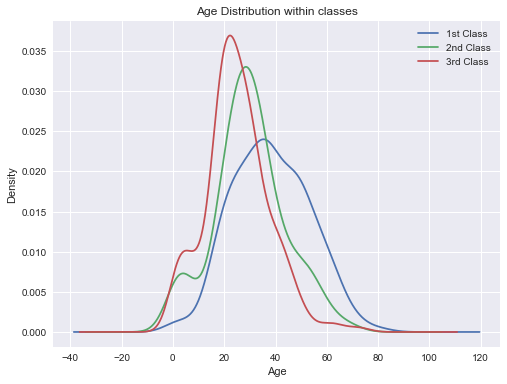

In [55]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
# 나이별로 pclass 분포에서 3등급이 많은것으로 보이고 40대 정도부터는 1,2등급도 많다 

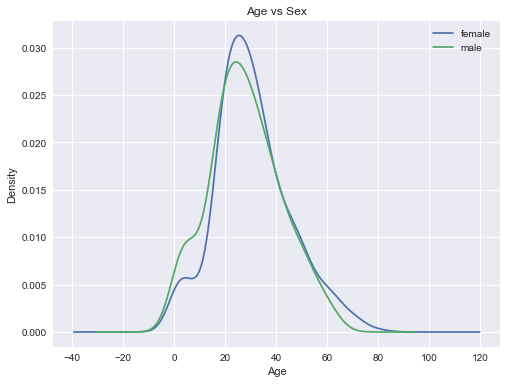

In [57]:
# 내가 추가
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Sex'] == 'male'].plot(kind='kde')
df_train['Age'][df_train['Sex'] == 'female'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age vs Sex')
plt.legend(['female','male'])
# 0~20살은 남자드롣 많다

### 2.5 Pclass , Sex , Age

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


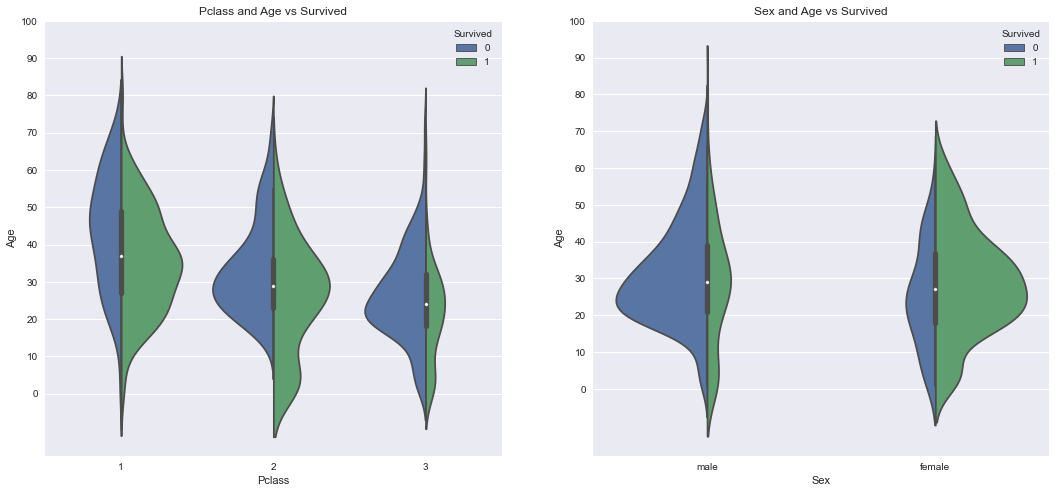

In [61]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
# pclass 에 따른 age 생존률 분석 

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
# sex 에 따른 age 생존률 분석

plt.show()
# violinplot 에서 split True로 놓으면 hue = survived 를 기준으로 합쳐진다 

### 2.6 Embarked

<AxesSubplot:xlabel='Embarked'>

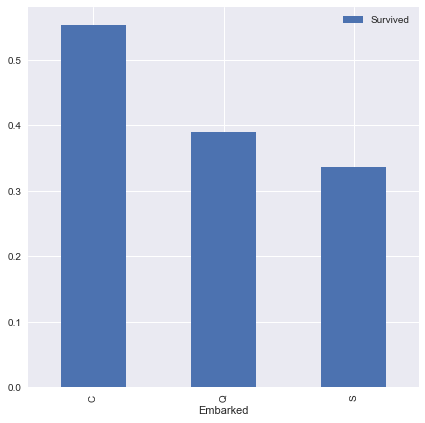

In [62]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
# 탑승한곳에 따른 생존률 평균 -> C>Q>S

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-p

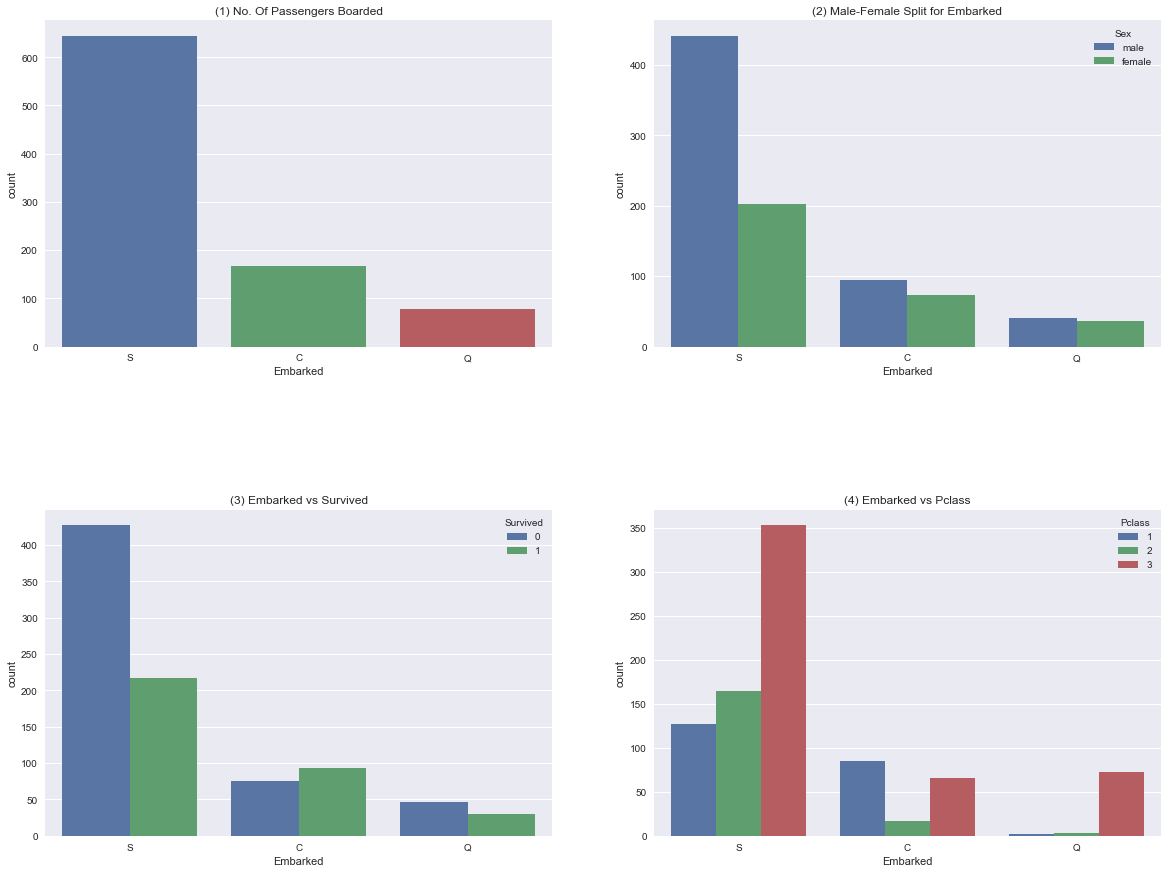

In [63]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
# S가 가장 많이 탑승함 (압도적)
# C가 생존확률이 높은 이유는 1등급 사람이 많아서 ?

### 2.7 Family - sibsp + parch

In [65]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [68]:
df_train['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


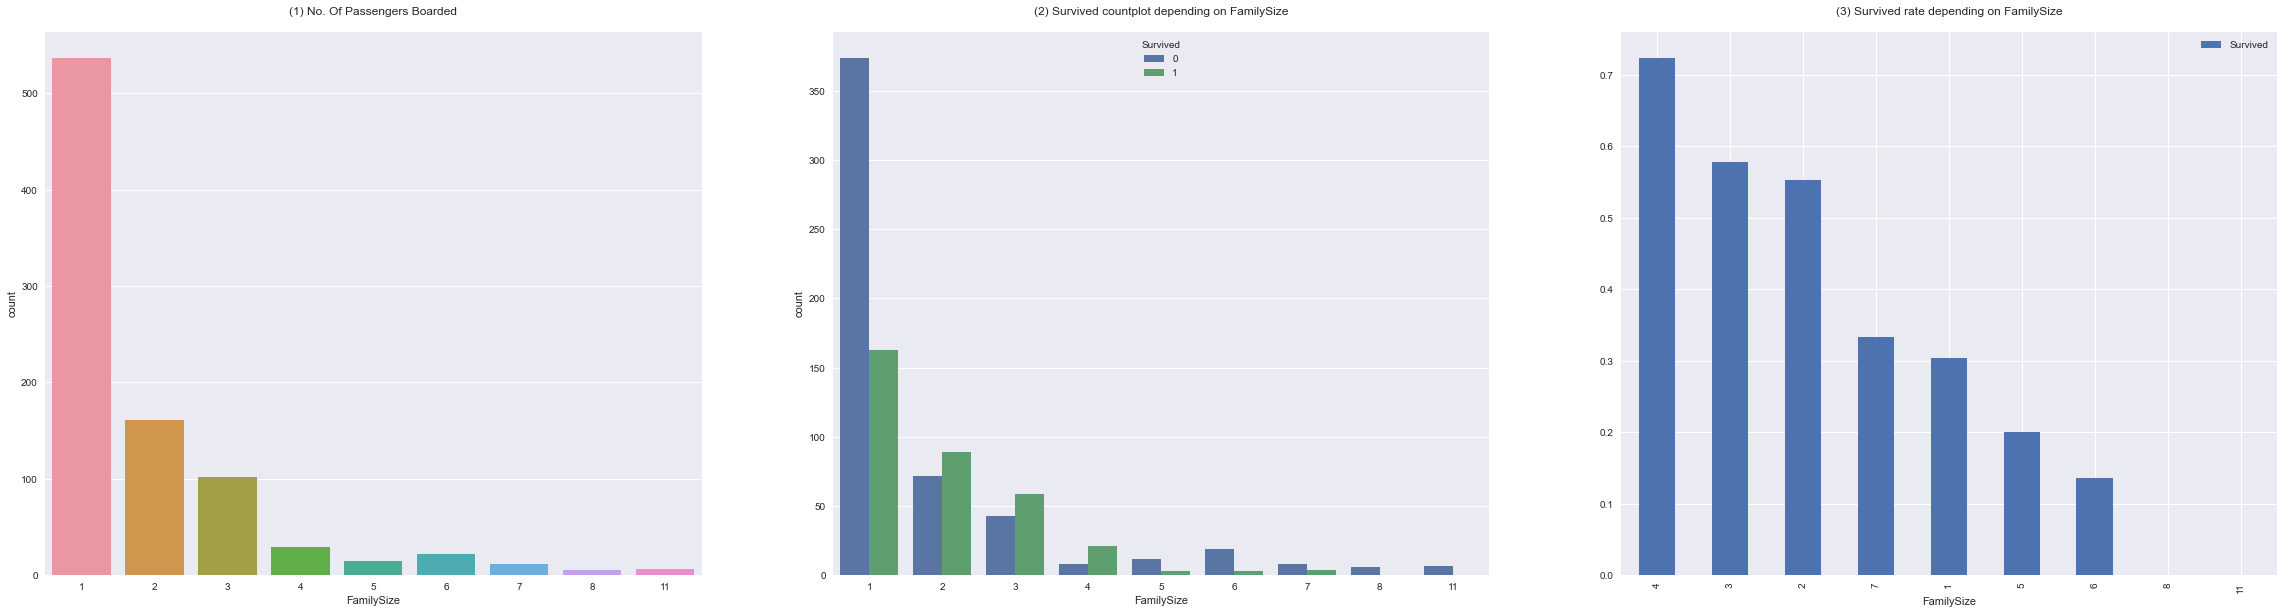

In [70]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)
# FamilySize별 그룹을 만들어서 평균 생존률을 구한다 

plt.subplots_adjust(wspace=0.2, hspace=0.5) # 가로 세로 간격을 조절한다 
plt.show()
# y옵션은 제목의 간격을 나태낸다 
# 가족수가 너무 많거나 적으면 생존을 거의 못함

### 2.8 Fare

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


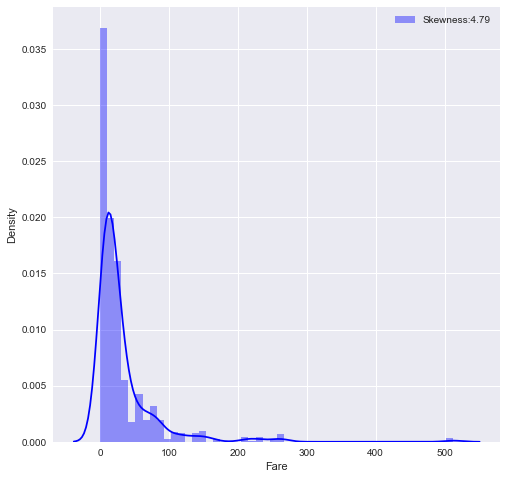

In [72]:
# 그냥 히스토 그램 그리기 
fig , ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best') # 최적의 레전드(범례)를 위치

# 매우 비대칭인것을 확인 할 수 있음 따라서 log 를 적용시킬 필요가 있다 

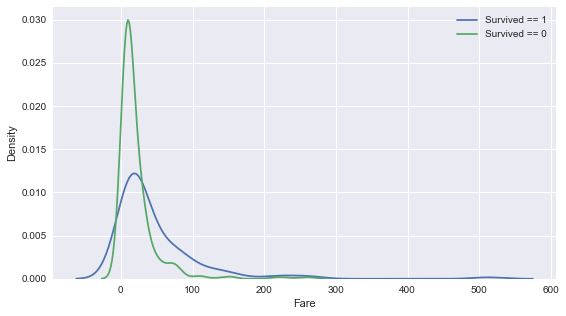

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Fare'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Fare'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show() # 연속 숫자형 자료랑 범주형을 나타낼때 두개를 한번에 그리기 위해 kdeplot 이용하면 좋다 
# fare가 한쪽으로 치우쳐져 있으며 낮을때 생존을 압도적으로 못함
# 너무 치우쳐저 있기 떄문에 log 취할 필요가 있다 

In [74]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
# 다 로그를 적용시켜 준다 (한쪽으로 치우침을 막기 위해 )

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


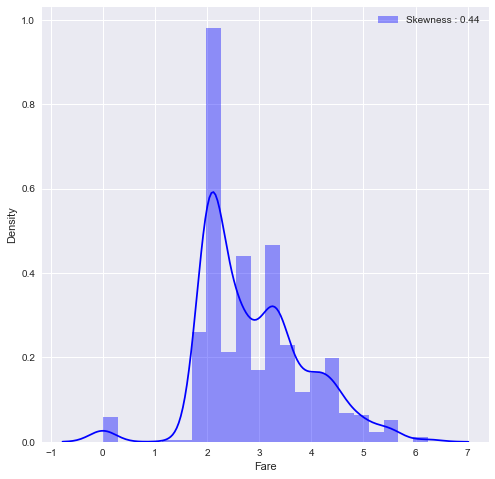

In [75]:
fig , ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best') # 확실히 치우침의 정도가 좋아짐

In [89]:
int_scores = df_train.loc[df_train['Ticket'].apply(lambda x: isinstance(x, int)), 'Ticket']
float_scores = df_train.loc[df_train['Ticket'].apply(lambda x: isinstance(x, float)), 'Ticket']